In [1]:
# importing packages
import pandas as pd
import glob,os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

folder_path = './Thesis'
file_list = glob.glob(folder_path + "/*.tsv")
main_dataframe = pd.DataFrame([])

for i in file_list:
    data = pd.read_csv(i,delimiter="\t",index_col=0)
    df=data[['est_counts']]
    df.columns = [os.path.basename(i).split('_')[0]]
    main_dataframe = pd.concat([main_dataframe,df],axis=1)
main_dataframe = main_dataframe.rename_axis('Transcript').reset_index()
main_dataframe

,Transcript,SRR8758292,SRR8758293,SRR8758294,SRR8758295,SRR8758296,SRR8758297
0,ENST00000632684.1,0.0,0.0,0.0,0.0,0.0,0.0
1,ENST00000434970.2,0.0,0.0,0.0,0.0,0.0,0.0
2,ENST00000448914.1,0.0,0.0,0.0,0.0,0.0,0.0
3,ENST00000415118.1,0.0,0.0,0.0,0.0,0.0,0.0
4,ENST00000631435.1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
187621,ENST00000639790.1,0.0,0.0,0.0,0.0,0.0,0.0
187622,ENST00000639660.1,0.0,0.0,0.0,0.0,0.0,0.0
187623,ENST00000643577.1,0.0,0.0,0.0,0.0,0.0,0.0
187624,ENST00000646356.1,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
main_dataframe.to_csv('./DGE/DGE_Transcript_input.csv', sep=',', index=False)

In [3]:
exp_transcripts=pd.read_csv('./DGE/DGE_Transcript_OUTPUT.csv',delimiter=",")
exp_transcripts

,Unnamed: 0,logFC,logCPM,F,PValue,FDR
0,ENST00000642959.1,12.780077,4.125378,8.117509e+02,2.167146e-07,0.009766
1,ENST00000264839.11,7.039579,6.093198,5.123476e+02,8.011904e-07,0.010995
2,ENST00000324873.7,6.731188,4.275613,5.078673e+02,8.213959e-07,0.010995
3,ENST00000378501.2,11.699566,2.951921,4.728617e+02,1.005704e-06,0.010995
4,ENST00000381405.4,5.859298,9.717271,4.160069e+02,1.445443e-06,0.010995
...,...,...,...,...,...,...
45060,ENST00000530887.5,0.000484,1.635819,4.311284e-08,9.998416e-01,0.999930
45061,ENST00000525728.5,-0.000338,0.292292,2.954832e-08,9.998689e-01,0.999932
45062,ENST00000532872.5,0.000223,0.172725,2.175642e-08,9.998875e-01,0.999932
45063,ENST00000508730.1,0.000061,2.078461,1.421102e-09,9.999712e-01,0.999974


In [4]:
gene_stable_id_isoforms=exp_transcripts['Unnamed: 0']
gene_stable_id_isoforms
gene_stable_id_isoforms.to_csv('./DGE/DGE_Transcript_genesinput_ensemble.txt', sep=',', index=False)

In [5]:
ExpressionS = []
for i in range(len(exp_transcripts)):
    logFC =exp_transcripts.iloc[i,1]
    FDR =exp_transcripts.iloc[i,5]
    if logFC > 2 and FDR <0.05:
        ExpressionS.append('Up regulated')
    elif logFC < -2 and FDR<0.05 :
        ExpressionS.append('Down regulated')
    else:
        ExpressionS.append('Unchanged')
exp_transcripts['ExpressionS']=ExpressionS
exp_transcripts['-log10_pvalue'] = -np.log10(exp_transcripts['PValue'])
exp_transcripts['-log10_FDR'] = -np.log10(exp_transcripts['FDR'])
exp_transcripts

,Unnamed: 0,logFC,logCPM,F,PValue,FDR,ExpressionS,-log10_pvalue,-log10_FDR
0,ENST00000642959.1,12.780077,4.125378,8.117509e+02,2.167146e-07,0.009766,Up regulated,6.664112,2.010272
1,ENST00000264839.11,7.039579,6.093198,5.123476e+02,8.011904e-07,0.010995,Up regulated,6.096264,1.958821
2,ENST00000324873.7,6.731188,4.275613,5.078673e+02,8.213959e-07,0.010995,Up regulated,6.085447,1.958821
3,ENST00000378501.2,11.699566,2.951921,4.728617e+02,1.005704e-06,0.010995,Up regulated,5.997530,1.958821
4,ENST00000381405.4,5.859298,9.717271,4.160069e+02,1.445443e-06,0.010995,Up regulated,5.839999,1.958821
...,...,...,...,...,...,...,...,...,...
45060,ENST00000530887.5,0.000484,1.635819,4.311284e-08,9.998416e-01,0.999930,Unchanged,0.000069,0.000030
45061,ENST00000525728.5,-0.000338,0.292292,2.954832e-08,9.998689e-01,0.999932,Unchanged,0.000057,0.000030
45062,ENST00000532872.5,0.000223,0.172725,2.175642e-08,9.998875e-01,0.999932,Unchanged,0.000049,0.000030
45063,ENST00000508730.1,0.000061,2.078461,1.421102e-09,9.999712e-01,0.999974,Unchanged,0.000012,0.000011


In [7]:
exp_isoforms1=exp_transcripts
exp_isoforms2=exp_transcripts

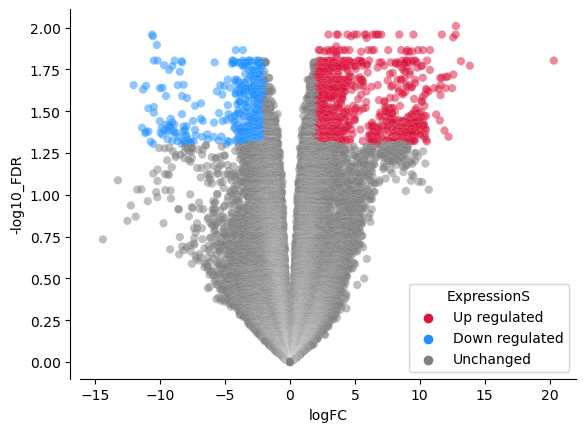

In [8]:
#Volcano plot
Expression = []
for i in range(len(exp_transcripts)):
    logFC =exp_transcripts.iloc[i,1]
    FDR =exp_transcripts.iloc[i,5]
    if logFC > 2 and FDR <0.05:
        Expression.append('Changed')
    elif logFC < -2 and FDR <0.05:
        Expression.append('Changed')
    else:
        Expression.append('Unchanged')
exp_transcripts['Expression']=Expression
exp_transcripts
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.tick_params(direction = 'out', top=False, right = False, bottom = True)
ax.spines['left'].set_position(('axes',-0.02))
sns.scatterplot(x=exp_transcripts['logFC'],y=exp_transcripts['-log10_FDR'],hue=exp_transcripts['ExpressionS'],palette=['crimson','dodgerblue','grey'],linewidth=0.1,alpha=0.5)
plt.xlabel("logFC")
plt.ylabel("-log10_FDR")
plt.savefig('DTE_Transcripts.png', format='png', dpi=600)
plt.show()

In [9]:
print(exp_transcripts['ExpressionS'].value_counts())

Unchanged         43605
Up regulated        992
Down regulated      468
Name: ExpressionS, dtype: int64


In [10]:
exp_transcripts.to_csv('./Thesis/Transcript_dge.csv', sep=',',index=False)

In [11]:
foxo1_confirm=pd.read_csv('./Thesis/foxo1_confirm.txt',sep='\t')
foxo1_confirm

,Gene stable ID,Transcript stable ID,Gene name,Transcript name
0,ENSG00000198888,ENST00000361390,MT-ND1,MT-ND1-201
1,ENSG00000198763,ENST00000361453,MT-ND2,MT-ND2-201
2,ENSG00000198804,ENST00000361624,MT-CO1,MT-CO1-201
3,ENSG00000198712,ENST00000361739,MT-CO2,MT-CO2-201
4,ENSG00000228253,ENST00000361851,MT-ATP8,MT-ATP8-201
...,...,...,...,...
43874,ENSG00000153187,ENST00000649899,HNRNPU,HNRNPU-231
43875,ENSG00000117139,ENST00000649542,KDM5B,KDM5B-232
43876,ENSG00000117139,ENST00000650569,KDM5B,KDM5B-240
43877,ENSG00000117139,ENST00000649770,KDM5B,KDM5B-233


In [12]:
exp_transcripts['Unnamed: 0'] = exp_transcripts['Unnamed: 0'].str[:15]
exp_transcripts.rename(columns = {'Unnamed: 0':'Transcript stable ID'}, inplace = True)
exp_transcripts

,Transcript stable ID,logFC,logCPM,F,PValue,FDR,ExpressionS,-log10_pvalue,-log10_FDR,Expression
0,ENST00000642959,12.780077,4.125378,8.117509e+02,2.167146e-07,0.009766,Up regulated,6.664112,2.010272,Changed
1,ENST00000264839,7.039579,6.093198,5.123476e+02,8.011904e-07,0.010995,Up regulated,6.096264,1.958821,Changed
2,ENST00000324873,6.731188,4.275613,5.078673e+02,8.213959e-07,0.010995,Up regulated,6.085447,1.958821,Changed
3,ENST00000378501,11.699566,2.951921,4.728617e+02,1.005704e-06,0.010995,Up regulated,5.997530,1.958821,Changed
4,ENST00000381405,5.859298,9.717271,4.160069e+02,1.445443e-06,0.010995,Up regulated,5.839999,1.958821,Changed
...,...,...,...,...,...,...,...,...,...,...
45060,ENST00000530887,0.000484,1.635819,4.311284e-08,9.998416e-01,0.999930,Unchanged,0.000069,0.000030,Unchanged
45061,ENST00000525728,-0.000338,0.292292,2.954832e-08,9.998689e-01,0.999932,Unchanged,0.000057,0.000030,Unchanged
45062,ENST00000532872,0.000223,0.172725,2.175642e-08,9.998875e-01,0.999932,Unchanged,0.000049,0.000030,Unchanged
45063,ENST00000508730,0.000061,2.078461,1.421102e-09,9.999712e-01,0.999974,Unchanged,0.000012,0.000011,Unchanged


In [13]:
dte=pd.merge(exp_transcripts,foxo1_confirm, on='Transcript stable ID',how='left')
dte=dte[dte['Expression']!='Unchanged']
dte
dte.to_csv('./Thesis/transcript_dge.csv',sep=',',index=False)
dte

,Transcript stable ID,logFC,logCPM,F,PValue,FDR,ExpressionS,-log10_pvalue,-log10_FDR,Expression,Gene stable ID,Gene name,Transcript name
0,ENST00000642959,12.780077,4.125378,811.750860,2.167146e-07,0.009766,Up regulated,6.664112,2.010272,Changed,ENSG00000180488,MIGA1,MIGA1-204
1,ENST00000264839,7.039579,6.093198,512.347625,8.011904e-07,0.010995,Up regulated,6.096264,1.958821,Changed,ENSG00000079841,RIMS1,RIMS1-201
2,ENST00000324873,6.731188,4.275613,507.867282,8.213959e-07,0.010995,Up regulated,6.085447,1.958821,Changed,ENSG00000176046,NUPR1,NUPR1-201
3,ENST00000378501,11.699566,2.951921,472.861700,1.005704e-06,0.010995,Up regulated,5.997530,1.958821,Changed,ENSG00000101333,PLCB4,PLCB4-204
4,ENST00000381405,5.859298,9.717271,416.006941,1.445443e-06,0.010995,Up regulated,5.839999,1.958821,Changed,ENSG00000164283,ESM1,ESM1-202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,ENST00000549606,-2.213613,3.805707,27.620321,2.202970e-03,0.049943,Down regulated,2.656991,1.301529,Changed,ENSG00000135446,CDK4,CDK4-206
1986,ENST00000590120,-2.727012,0.290874,27.617946,2.203431e-03,0.049943,Down regulated,2.656901,1.301529,Changed,ENSG00000104903,LYL1,LYL1-202
1987,ENST00000221233,-2.810507,2.547509,27.614654,2.204070e-03,0.049943,Down regulated,2.656775,1.301529,Changed,ENSG00000077348,EXOSC5,EXOSC5-201
1989,ENST00000644510,2.649819,5.939862,28.839590,2.206484e-03,0.049957,Up regulated,2.656299,1.301402,Changed,ENSG00000136631,VPS45,VPS45-214


In [15]:
dge=pd.merge(exp_transcripts,foxo1_confirm, on='Transcript stable ID',how='left')
dge= dge.sort_values("PValue")
dge=dge[['Gene name', 'logFC','PValue']]
dge['Value']=-np.log(dge['PValue'])*np.sign(dge['logFC'])
dge=dge[['Gene name','Value']]
dge.to_csv('./DGE/GSA_input_transcript.rnk', sep='\t',index=False)
dge

,Gene name,Value
0,MIGA1,15.344684
1,RIMS1,14.037167
2,NUPR1,14.012261
3,PLCB4,13.809823
4,ESM1,13.447094
...,...,...
45060,PSMC3,0.000158
45061,FAM118B,-0.000131
45062,RPS3,0.000113
45063,WDR70,0.000029


In [16]:
#isoforms analysis
import statistics
dge=pd.merge(exp_transcripts,foxo1_confirm, on='Transcript stable ID',how='left')
dge=dge[['Gene name', 'Transcript name','ExpressionS']]
dge = dge[dge['ExpressionS'] !='Unchanged']
isoforms_analysis=dge.groupby(['Gene name','Transcript name','ExpressionS']).size().reset_index(name='counts')
isoforms_analysis=isoforms_analysis.groupby(['Gene name','Transcript name','ExpressionS']).agg({'counts': 'sum'}).reset_index()
isoforms_analysis=isoforms_analysis.groupby(['Gene name','Transcript name'])['ExpressionS'].apply(statistics.mode).to_frame()
isoforms_analysis=isoforms_analysis.reset_index()
isoforms_analysis
rslt_df = isoforms_analysis
rslt_df

,Gene name,Transcript name,ExpressionS
0,ABAT,ABAT-201,Up regulated
1,ABCA4,ABCA4-201,Up regulated
2,ABCA4,ABCA4-206,Up regulated
3,ABCA4,ABCA4-207,Up regulated
4,ABCA6,ABCA6-206,Up regulated
...,...,...,...
1402,ZNF670,ZNF670-201,Up regulated
1403,ZNF702P,ZNF702P-201,Down regulated
1404,ZNF714,ZNF714-201,Up regulated
1405,ZPLD1,ZPLD1-201,Up regulated


In [17]:
# Group by 'Gene' column and check for different expressions
gene_groups = dge.groupby('Gene name')['ExpressionS'].nunique()
# Filter genes with more than one unique expression
genes_with_diff_isoforms = gene_groups[gene_groups > 1]
genes_with_diff_isoforms

Gene name
FOXRED1    2
ODF2       2
RPS27L     2
YIPF1      2
ZNF518A    2
Name: ExpressionS, dtype: int64

In [18]:
#Switch of isoforms with threshold |logFC|>0
exp_isoforms1
ExpressionS = []
for i in range(len(exp_isoforms1)):
    logFC =exp_isoforms1.iloc[i,1]
    FDR =exp_isoforms1.iloc[i,5]
    if logFC > 0:
        ExpressionS.append('Up regulated')
    elif logFC < 0:
        ExpressionS.append('Down regulated')
exp_isoforms1['ExpressionS']=ExpressionS
exp_isoforms1

,Transcript stable ID,logFC,logCPM,F,PValue,FDR,ExpressionS,-log10_pvalue,-log10_FDR,Expression
0,ENST00000642959,12.780077,4.125378,8.117509e+02,2.167146e-07,0.009766,Up regulated,6.664112,2.010272,Changed
1,ENST00000264839,7.039579,6.093198,5.123476e+02,8.011904e-07,0.010995,Up regulated,6.096264,1.958821,Changed
2,ENST00000324873,6.731188,4.275613,5.078673e+02,8.213959e-07,0.010995,Up regulated,6.085447,1.958821,Changed
3,ENST00000378501,11.699566,2.951921,4.728617e+02,1.005704e-06,0.010995,Up regulated,5.997530,1.958821,Changed
4,ENST00000381405,5.859298,9.717271,4.160069e+02,1.445443e-06,0.010995,Up regulated,5.839999,1.958821,Changed
...,...,...,...,...,...,...,...,...,...,...
45060,ENST00000530887,0.000484,1.635819,4.311284e-08,9.998416e-01,0.999930,Up regulated,0.000069,0.000030,Unchanged
45061,ENST00000525728,-0.000338,0.292292,2.954832e-08,9.998689e-01,0.999932,Down regulated,0.000057,0.000030,Unchanged
45062,ENST00000532872,0.000223,0.172725,2.175642e-08,9.998875e-01,0.999932,Up regulated,0.000049,0.000030,Unchanged
45063,ENST00000508730,0.000061,2.078461,1.421102e-09,9.999712e-01,0.999974,Up regulated,0.000012,0.000011,Unchanged


In [19]:
import statistics
dge1=pd.merge(exp_isoforms1,foxo1_confirm, on='Transcript stable ID',how='left')
dge1=dge1[['Gene name', 'Transcript name','ExpressionS']]
dge1 = dge1[dge1['ExpressionS'] !='Unchanged']
isoforms_analysis1=dge1.groupby(['Gene name','Transcript name','ExpressionS']).size().reset_index(name='counts')
isoforms_analysis1=isoforms_analysis1.groupby(['Gene name','Transcript name','ExpressionS']).agg({'counts': 'sum'}).reset_index()
isoforms_analysis1=isoforms_analysis1.groupby(['Gene name','Transcript name'])['ExpressionS'].apply(statistics.mode).to_frame()
isoforms_analysis1=isoforms_analysis1.reset_index()
isoforms_analysis1
rslt_df1 = isoforms_analysis1
rslt_df1

,Gene name,Transcript name,ExpressionS
0,A1BG,A1BG-204,Down regulated
1,A2M,A2M-201,Up regulated
2,A4GALT,A4GALT-201,Up regulated
3,A4GALT,A4GALT-202,Down regulated
4,A4GALT,A4GALT-203,Up regulated
...,...,...,...
43437,ZZEF1,ZZEF1-207,Up regulated
43438,ZZEF1,ZZEF1-210,Up regulated
43439,ZZZ3,ZZZ3-201,Down regulated
43440,ZZZ3,ZZZ3-202,Up regulated


In [20]:
# Group by 'Gene' column and check for different expressions
gene_groups1 = rslt_df1.groupby('Gene name')['ExpressionS'].nunique()
# Filter genes with more than one unique expression
genes_with_diff_isoforms1 = gene_groups1[gene_groups1 > 1]
genes_with_diff_isoforms1=genes_with_diff_isoforms1.reset_index()
#genes_with_diff_isoforms.to_csv('./Thesis/Switch_isoforms.csv', sep='\t')
genes_with_diff_isoforms1

,Gene name,ExpressionS
0,A4GALT,2
1,AAGAB,2
2,AAK1,2
3,AAMP,2
4,AASDH,2
...,...,...
4974,ZWILCH,2
4975,ZWINT,2
4976,ZXDC,2
4977,ZYX,2
